In [1]:
import pandas as pd
import numpy as np
import sklearn
import category_encoders as ce
import os

In [2]:
KAGGLE_PATH = "/kaggle/input/brain-tumor-stage-based-recurrence-patterns/BrainTumor.csv"
LOCAL_PATH = "BrainTumor.csv"

dataset = None

if os.path.exists(KAGGLE_PATH):
    dataset = KAGGLE_PATH
elif os.path.exists(LOCAL_PATH):
    dataset = LOCAL_PATH
else:
    raise Exception("Could not find dataset")
    
df = pd.read_csv(dataset)

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df = df.rename(columns={ 'survival_time_(months)' : 'survival_time'})
df = df.rename(columns={ 'time_to_recurrence_(months)' : 'time_to_recurrence'})
df

,patient_id,age,gender,tumor_type,tumor_grade,tumor_location,treatment,treatment_outcome,time_to_recurrence,recurrence_site,survival_time
0,1,45,Male,Glioblastoma,IV,Frontal lobe,Surgery,Partial response,10.0,Temporal lobe,18
1,2,55,Female,Meningioma,I,Parietal lobe,Surgery,Complete response,NaN,NaN,36
2,3,60,Male,Astrocytoma,III,Occipital lobe,Surgery + Chemotherapy,Progressive disease,14.0,Frontal lobe,22
3,4,50,Female,Glioblastoma,IV,Temporal lobe,Surgery + Radiation therapy,Complete response,NaN,NaN,12
4,5,65,Male,Astrocytoma,II,Frontal lobe,Surgery + Radiation therapy,Partial response,24.0,Frontal lobe,48
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,49,Female,Meningioma,I,Parietal lobe,Radiation,Progressive disease,18.0,Parietal lobe,32
1996,1997,57,Male,Glioblastoma,IV,Occipital lobe,Surgery,Complete response,NaN,NaN,38
1997,1998,45,Female,Meningioma,I,Temporal lobe,Chemotherapy,Partial response,20.0,Temporal lobe,44
1998,1999,62,Male,Astrocytoma,III,Frontal lobe,Radiation,Stable disease,22.0,Frontal lobe,28


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='survival_time', ylabel='Count'>

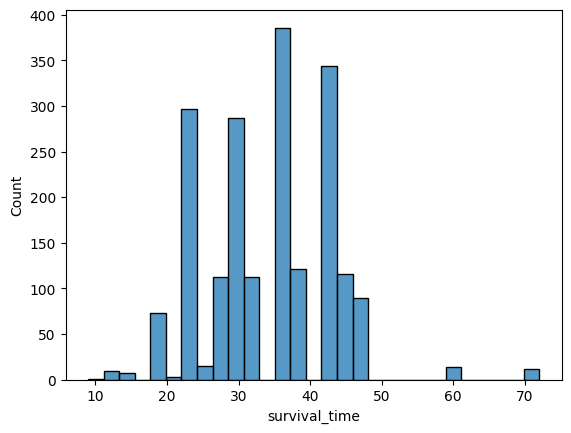

In [6]:
sns.histplot(df.survival_time)

# One Hot Encoder For Categorical Data

In [7]:
ce_OHE = ce.OneHotEncoder(cols=['gender','tumor_type', 'tumor_grade', 'tumor_location', 'treatment', 'treatment_outcome', 'recurrence_site'])

data1 = ce_OHE.fit_transform(df)
data1.head()

,patient_id,age,gender_1,gender_2,tumor_type_1,tumor_type_2,tumor_type_3,tumor_grade_1,tumor_grade_2,tumor_grade_3,...,treatment_outcome_2,treatment_outcome_3,treatment_outcome_4,time_to_recurrence,recurrence_site_1,recurrence_site_2,recurrence_site_3,recurrence_site_4,recurrence_site_5,survival_time
0,1,45,1,0,1,0,0,1,0,0,...,0,0,0,10.0,1,0,0,0,0,18
1,2,55,0,1,0,1,0,0,1,0,...,1,0,0,NaN,0,0,0,0,1,36
2,3,60,1,0,0,0,1,0,0,1,...,0,1,0,14.0,0,1,0,0,0,22
3,4,50,0,1,1,0,0,1,0,0,...,1,0,0,NaN,0,0,0,0,1,12
4,5,65,1,0,0,0,1,0,0,0,...,0,0,0,24.0,0,1,0,0,0,48


In [8]:
y = data1.loc[:, 'survival_time']
y = y.fillna(y.mean())

In [9]:
X = data1.drop(columns=['survival_time', 'patient_id'])
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.mean())

# Spliting Data

In [10]:
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [11]:
x_train = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

# Using scikit-learn


In [12]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [13]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
# Model Predictions
y_preds = model.predict(x_test)

In [14]:
# Evaluate model using evaluation functions
print('Regression metrics on the test set')
print(f'R2 Score: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R2 Score: 0.8127780482698805
MAE: 1.5955095519660814
MSE: 13.836633662065687


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
# Model Predictions
y_preds = model.predict(x_test)

In [17]:
# Evaluate model using evaluation functions
print('Regression metrics on the test set')
print(f'R2 Score: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression metrics on the test set
R2 Score: 0.4050700313322776
MAE: 5.136926982673618
MSE: 43.96828446113881
